<a href="https://colab.research.google.com/github/frnunez/MS-Portfolio-Syracuse-University/blob/master/IST%20719%20-%20Data%20Visualization%20-%20Hubway%20Challenge%20Dataset%20Poster%20Design/IST%20719%20-%20Data%20Visualization%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Antonio Llorens / Francisco Nunez-Fondeur
# Description: IST 719 - Syracuse University
# Project: Mapping Hubway Challange Data Set
# Date - 09/15/2019

## Import Libraries & Data
Lets import the R packages we will be using

In [0]:
#-----    Install Libraries ----#
#Install leaflet
if (!require(leaflet)) install.packages('leaflet')

#dplyr=
if (!require(dplyr)) install.packages('dplyr')

#Rcolorbrewer
if (!require(RColorBrewer)) install.packages('RColorBrewer')

#ggplot2
if (!require(ggplot2)) install.packages('ggplot2')

#ggpubr
if (!require(ggpubr)) install.packages('ggpubr')

#tidyr
if (!require(tidyr)) install.packages('tidyr')

#lubridate
if (!require(lubridate)) install.packages('lubridate')

Loading required package: leaflet
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: RColorBrewer
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: ggpubr
Loading required package: magrittr
Loading required package: tidyr

Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [0]:
#-----     Importing Datasets            -----#
      # Set url link for the location of the dataset
      HubwayURL <- "http://files.hubwaydatachallenge.org/hubway_2011_07_through_2013_11.zip"
      
      # Download the .zip file and unzip contents
      download.file(HubwayURL, dest = "hubway.zip", mode = "wb") 
      unzip("hubway.zip", exdir = "hubway")
      
      # Assess the files contained in the .zip file and then import each dataset
      list.files("hubway")
      hubway_stations <- read.csv(unz("hubway.zip", "hubway_stations.csv"))
      hubway_trips <- read.csv(unz("hubway.zip", "hubway_trips.csv"))
      
      #Basic Descriptive Info
      hubway_trips[1:5, 1:10]
      str(hubway_trips)
      dim(hubway_trips)

[1] "hubway_stations.csv" "hubway_trips.csv"    "README.txt"

seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type
1,8,Closed,9,7/28/2011 10:12:00,23,7/28/2011 10:12:00,23,B00468,Registered
2,9,Closed,220,7/28/2011 10:21:00,23,7/28/2011 10:25:00,23,B00554,Registered
3,10,Closed,56,7/28/2011 10:33:00,23,7/28/2011 10:34:00,23,B00456,Registered
4,11,Closed,64,7/28/2011 10:35:00,23,7/28/2011 10:36:00,23,B00554,Registered
5,12,Closed,12,7/28/2011 10:37:00,23,7/28/2011 10:37:00,23,B00554,Registered


'data.frame':	1579025 obs. of  13 variables:
 $ seq_id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ hubway_id : int  8 9 10 11 12 13 14 15 16 17 ...
 $ status    : Factor w/ 1 level "Closed": 1 1 1 1 1 1 1 1 1 1 ...
 $ duration  : int  9 220 56 64 12 19 24 7 8 1108 ...
 $ start_date: Factor w/ 521432 levels "10/1/2011 00:01:00",..: 337342 337343 337344 337345 337346 337347 337348 337349 337350 337351 ...
 $ strt_statn: int  23 23 23 23 23 23 23 23 23 47 ...
 $ end_date  : Factor w/ 515102 levels "10/1/2011 00:00:00",..: 333544 333545 333546 333547 333548 333549 333550 333551 333552 333559 ...
 $ end_statn : int  23 23 23 23 23 23 23 23 23 40 ...
 $ bike_nr   : Factor w/ 1164 levels "","A07799","A07800",..: 484 569 472 569 569 472 569 569 569 565 ...
 $ subsc_type: Factor w/ 2 levels "Casual","Registered": 2 2 2 2 2 2 2 2 2 2 ...
 $ zip_code  : Factor w/ 531 levels "","'00210","'00216",..: 523 233 168 176 522 143 199 199 522 104 ...
 $ birth_date: int  1976 1966 1943 1981 1983 1951 1971 1971 1

[1] 1579025      13

## Creating INteractive Map of Boston Area

---




### Create Boston MBTA Subway Stations Map
Uing Ray Cha's Open Trasit Data Toolkit


In [0]:
#####-----     Mapping Stations     -----#####
    #--- Create the Boston Subway Stations Map ---#
          # MBTA mapping code provided by - Ray Cha's Open Transit Data Toolkit:
          # https://transitdatatoolkit.com/lessons/mapping-a-transit-system/
          
          # Read in MBTA Station txt file
          # File named "stops" included in zip file and should be loaded into your working directory
          #Download stops file into your working directory first
          rawlocs <- read.csv(file="./stops.txt", head=TRUE,sep=",")
          
          # Select columns with MBTA T stations
          station_locs <- rawlocs
          
          #Select the columns we want and change columns name to latitude and longitude
          station_locs <- station_locs[c("stop_id","stop_desc","stop_name","platform_code","stop_lat","stop_lon","parent_station")]
          colnames(station_locs)[1] <- "id"
          colnames(station_locs)[2] <- "terminal"
          colnames(station_locs)[3] <- "station_name"
          colnames(station_locs)[4] <- "municipal"
          colnames(station_locs)[5] <- "latitude"
          colnames(station_locs)[6] <- "longitude"
          colnames(station_locs)[7] <- "status"
          
          # Convert the columns imported as a factor to characters
          station_locs$id <- as.character(station_locs$id)
          station_locs$station_name <- as.character(station_locs$station_name)
          
          # Remove all the rows which do not contain numbers
          station_locs <- station_locs[!is.na(as.numeric(station_locs$id)), ]
          
          # Convert the Stop ID column into numbers
          station_locs$id = as.numeric(station_locs$id)
          
          # Select columns with MBTA T stations
          station_locs <- station_locs[which ((station_locs$id >= 70000) & (station_locs$id <= 70279) ),]
          
          
          # Saint Paul Street Station names are altered to include their line.
          # This change is doen to be able to distinguish the two stations 
          # named Saint Paul Street on the B and C line.
          
          station_locs$station_name[station_locs$id == 70141] <-  "Saint Paul Street B Line"
          station_locs$station_name[station_locs$id == 70218] <-  "Saint Paul Street C Line"
          
          # Find the unique lat and lon coordinates
          station_locs <- station_locs[!duplicated(station_locs[c("latitude", "longitude")]),]
          
          # Select the rows which do not have Outbound in the text
          # Remove string with dash
          station_locs$station_name <- sub("\\-.*","",station_locs$station_name)
          
          #Remove and extra spaces
          station_locs$station_name <- trimws(station_locs$station_name,which = c("right"))
          
          station_locs$type <- c("MBTA-Subway")
          
          # Map the stations
          # Lat Long corrdinates from www.latlong.net
          mbta_subway <- leaflet(station_locs) %>%
            addTiles() %>%  
            setView(-71.057083, 42.361145, zoom = 12) %>%
            addCircles(~longitude, ~latitude, weight = 3, radius=120, 
                       color="#0b2f4c", stroke = TRUE, fillOpacity = 0.8) %>% 
            addLegend("bottomleft", colors="#0b2f4c", labels="Data Source: MBTA Developer Portal", title="MBTA Subway Stations")
          
          # show the map
          mbta_subway

Warning message in `[.data.frame`(station_locs, !is.na(as.numeric(station_locs$id)), :
"NAs introduced by coercion"

HTML widgets cannot be represented in plain text (need html)

### BLUEBikes Station Location Map

In [0]:
#-----     Creating BLUEbikes Station Location Map           -----#
          # Blue Bikes branding
          # https://motivateco.app.box.com/s/cw4tluatehnpfff4wzmch7v2f4ewa0uz
          
          #--- Modifying Data ---#
          stations <- hubway_stations
          
          # Change column names
          colnames(stations)[3] <- "station_name"
          colnames(stations)[5] <- "latitude"
          colnames(stations)[6] <- "longitude"
          
          # Convert the columns imported as a factor to characters
          stations$station_name <- as.character(stations$station_name)
          
          # Convert the ID column into numbers
          stations$id = as.numeric(stations$id)
          
          stations$type <- c("BLUEbikes")
          
          #--- Create the BLUEbikes Stations Map ---#
          # Lat Long corrdinates from www.latlong.net
          station_map <- leaflet(stations) %>%
            addTiles() %>%  
            setView(-71.057083, 42.361145, zoom = 12) %>%
            addCircles(~longitude, ~latitude, weight = 3, radius=120, 
                       color="#0090DA", stroke = TRUE, fillOpacity = 0.8) %>% 
            addLegend("bottomleft", colors="#0090DA", labels="Data Source: Hubway Challenge Dataset", title="Hubway BLUEbikes Station Locations")
          
          # Plot the map
          station_map

HTML widgets cannot be represented in plain text (need html)

### Combined Map

In [0]:
   #--- Combine Both Maps into one ---#
          #https://rstudio.github.io/leaflet/markers.html
          
          bostonstations <- rbind(stations,station_locs)
          
          #Plot map
          #colors
          pal <- colorFactor(c("#0090DA", "#0b2f4c"), domain = c("BLUEbikes", "MBTA-Subway"))
          
          #plot map
          boston_map <- leaflet(bostonstations) %>%
            addTiles() %>%  
            setView(-71.057083, 42.361145, zoom = 12) %>%
            addCircles(~longitude, ~latitude, weight = 3, radius=~ifelse(type == "type", 120, 120), 
                       color=~pal(type), stroke = TRUE, fillOpacity = 0.8) %>% 
            addLegend("bottomleft", pal=pal, values=~type, title="MBTA Subway & Bluebike Stations")
          boston_map

HTML widgets cannot be represented in plain text (need html)

## Trips Data Preparation

In [0]:
#####-----     Trips Data     -----#####
 #--- Main Trips Data ---##
    # Total Trips set
        trips <- hubway_trips
    
        # Clean Up
              trips$gender <- as.character(trips$gender)
              trips$gender[trips$gender==""] <- "Unreported"
              trips$gender <- as.factor(trips$gender)
              trips$zip_code <- as.character(trips$zip_code)
              trips$zip_code[trips$zip_code==""] <- "Unreported"
              trips$zip_code <- as.factor(trips$zip_code)
              
        # Create Age Column (Approximate)
              trips <- trips %>%
                mutate(age = 2019-birth_date)
        
        # Basic Stats
              summary(trips) 
              
    # Create Casual ONLY Set
          tripscasual <- filter(trips, subsc_type=="Casual")
          tripscasual <- tripscasual[,c(1,2,4:9)] #Removed Unreported Columns (Zip, DOB, Gender)
            
    # Create Regsitered ONLY Set
          tripsregistered <- filter(trips, subsc_type=="Registered")

     seq_id          hubway_id          status           duration       
 Min.   :      1   Min.   :      8   Closed:1579025   Min.   :   -6900  
 1st Qu.: 394757   1st Qu.: 446525                    1st Qu.:     412  
 Median : 789513   Median : 895044                    Median :     660  
 Mean   : 789513   Mean   : 886532                    Mean   :    1200  
 3rd Qu.:1184269   3rd Qu.:1328083                    3rd Qu.:    1082  
 Max.   :1579025   Max.   :1748022                    Max.   :11994458  
                                                                        
               start_date        strt_statn                    end_date      
 7/30/2013 17:18:00 :     25   Min.   :  3.00   10/19/2013 16:26:00:     27  
 8/6/2013 17:50:00  :     25   1st Qu.: 27.00   9/10/2013 17:43:00 :     26  
 9/10/2013 17:04:00 :     25   Median : 48.00   8/13/2013 18:08:00 :     24  
 10/4/2013 17:06:00 :     24   Mean   : 54.38   8/5/2013 17:30:00  :     24  
 7/30/2013 17:30:00 :     

subsc_type,counts
Casual,472611
Registered,1106414


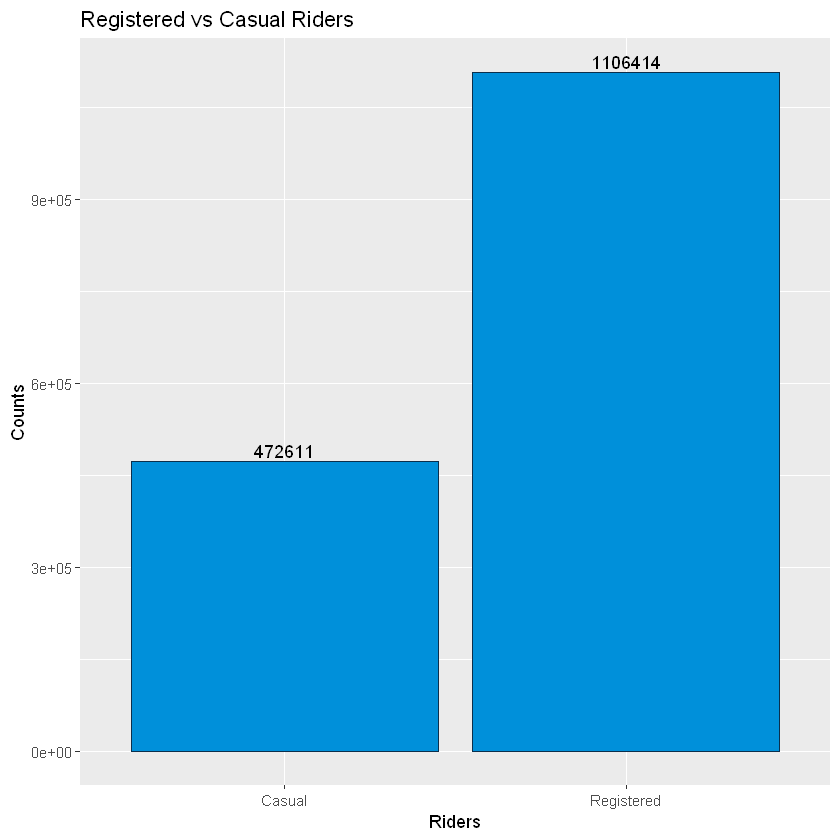

In [0]:
 #--- Basic User/Rider Demographics ---#
    # Casual vs Registered
         ridership <- trips %>%
           group_by(subsc_type) %>%
           summarise(counts = n())
         ridership
         
         #Bar Chart
         ggplot(ridership, aes(x=subsc_type, y=counts, fill=subsc_type)) +
           geom_bar(stat = "identity", color="#0b2f4c", fill = "#0090DA") +
           geom_text(aes(label = counts), vjust = -0.3) +
           ggtitle("Registered vs Casual Riders") + xlab("Riders") + ylab("Counts")

Warning message in brewer.pal(2, "Blues"):
"minimal value for n is 3, returning requested palette with 3 different levels
"

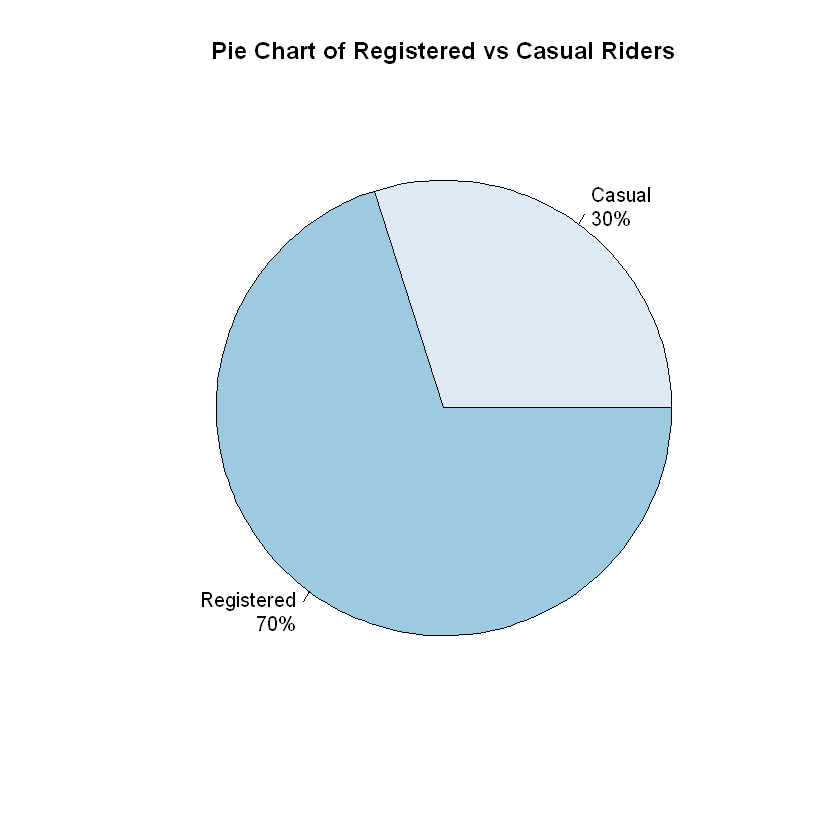

In [0]:
         # Pie Chart version
         regtable <- table(trips$subsc_type)
         regtable <- sort(regtable)
         pct <- round(regtable/sum(regtable)*100)
         lbls <- paste(names(regtable), "\n", pct, sep="")
         lbls <- paste(lbls,"%",sep="") # ad % to labels 
         pie(regtable, labels = lbls, col=brewer.pal(2, "Blues"),
             main="Pie Chart of Registered vs Casual Riders")  

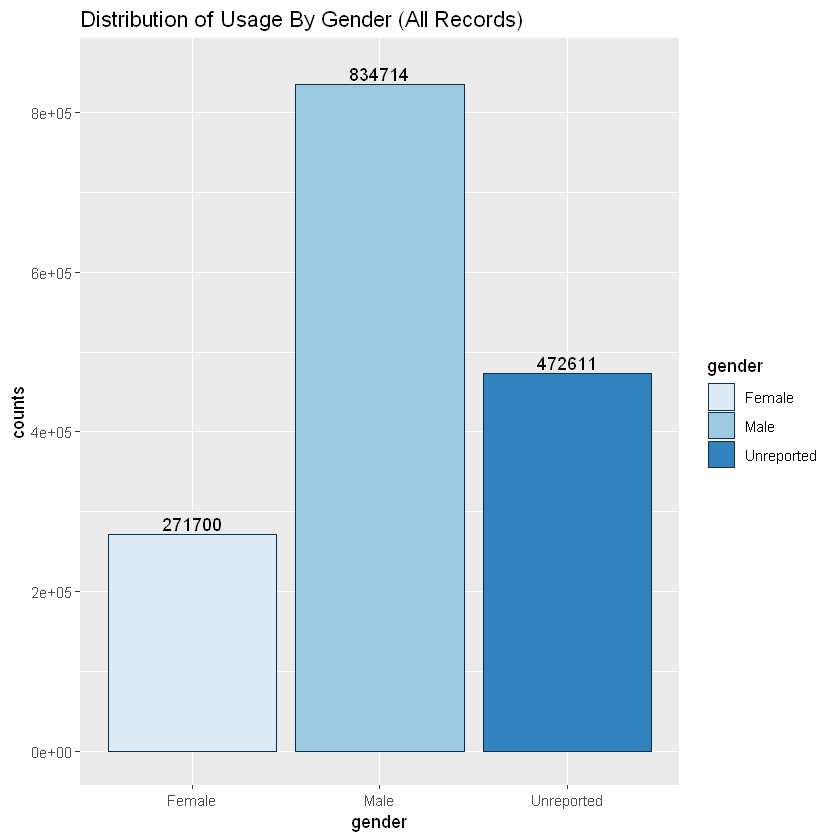

In [0]:
    # Rides By Gender
        # All Records
              gentrips <- trips %>%
                group_by(gender) %>%
                summarise(counts = n())
              
              ggplot(gentrips, aes(x = gender, y = counts, fill=gender)) +
                geom_bar(stat = "identity", color="#0b2f4c") + scale_fill_brewer(palette="Blues") +
                geom_text(aes(label = counts), vjust = -0.3) +
                ylim(0,850000)+ ggtitle("Distribution of Usage By Gender (All Records)")

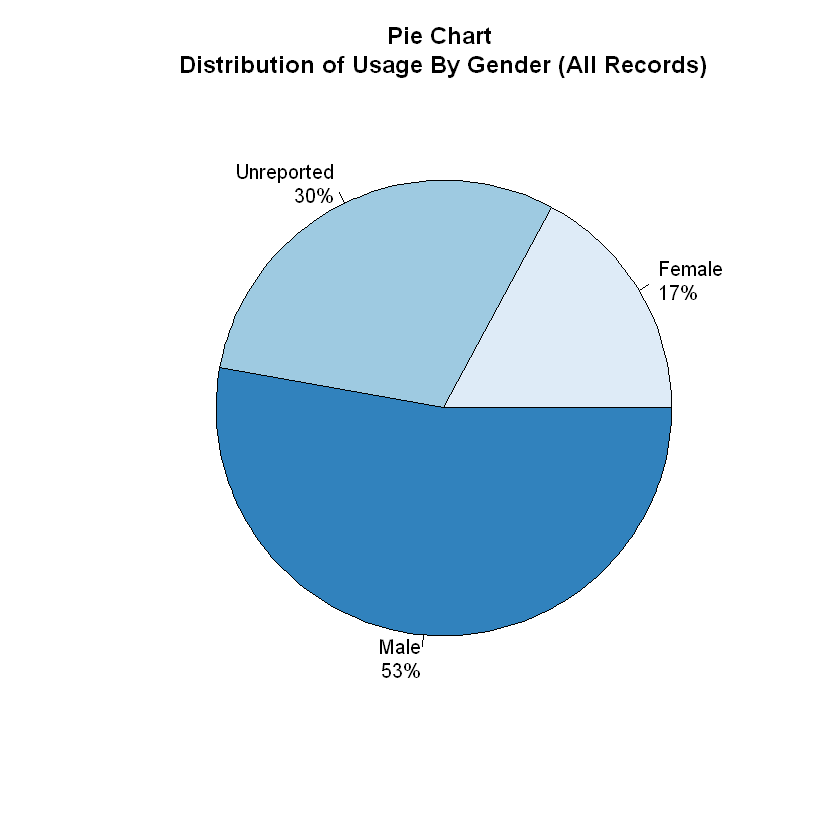

In [0]:
              # Pie Chart version
              gendertable <- table(trips$gender)
              gendertable <- sort(gendertable)
              pct <- round(gendertable/sum(gendertable)*100)
              lbls <- paste(names(gendertable), "\n", pct, sep="")
              lbls <- paste(lbls,"%",sep="") # ad % to labels 
              pie(gendertable, labels = lbls, col=brewer.pal(3, "Blues"),
                  main="Pie Chart \nDistribution of Usage By Gender (All Records)")

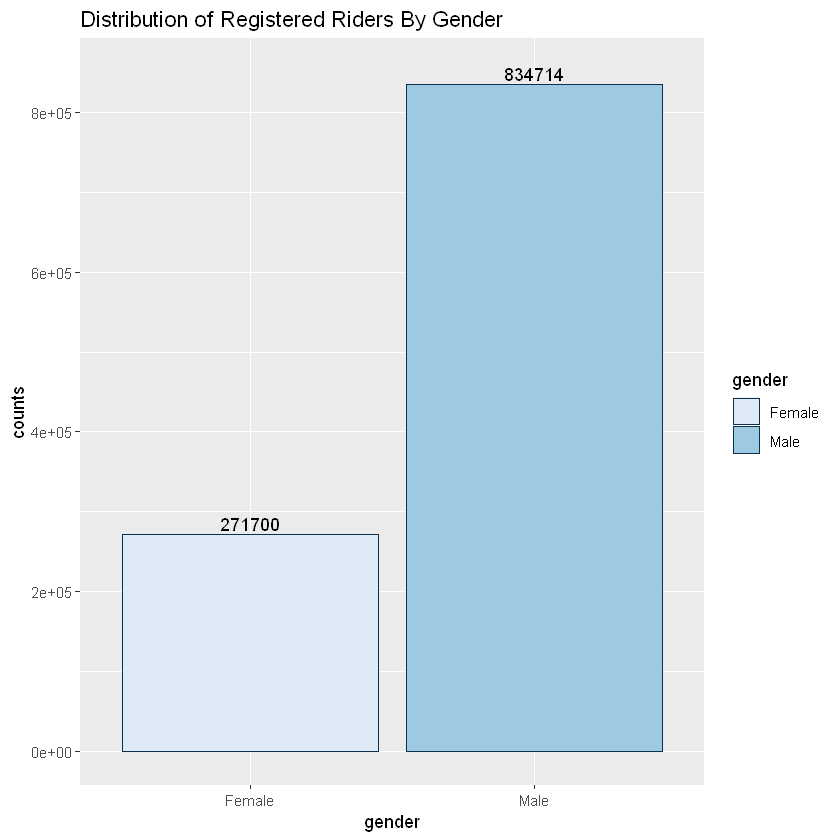

In [0]:
        # Registered Users ONLY
              genreg <- tripsregistered %>%
                group_by(gender) %>%
                summarise(counts = n())
              
              ggplot(genreg, aes(x = gender, y = counts, fill=gender)) +
                geom_bar(stat = "identity", color="#0b2f4c") + scale_fill_brewer(palette="Blues") +
                geom_text(aes(label = counts), vjust = -0.3) +
                ylim(0,850000)+ ggtitle("Distribution of Registered Riders By Gender")

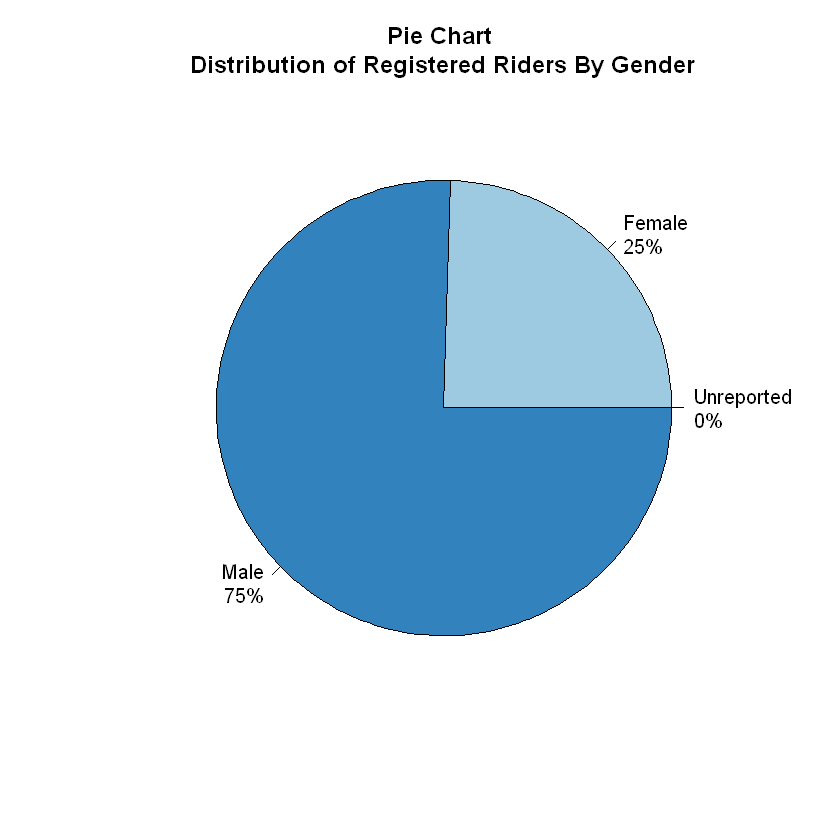

In [0]:
              # Pie Chart version
              genregtable <- table(tripsregistered$gender)
              genregtable <- sort(genregtable)
              pct <- round(genregtable/sum(genregtable)*100)
              lbls <- paste(names(genregtable), "\n", pct, sep="")
              lbls <- paste(lbls,"%",sep="") # ad % to labels 
              pie(genregtable, labels = lbls, col=brewer.pal(3, "Blues"),
                  main="Pie Chart \nDistribution of Registered Riders By Gender")

In [0]:
    # Distribution of Age (No Casual Riders Reported Age)
              
              # Stats for All Rider Ages
              length(tripsregistered$age) # 1106414 total registered riders
              sum(is.na(tripsregistered$age)) # 755770 did not report their age
              sum(!is.na(tripsregistered$age)) # 350644 reported their age
              summary(tripsregistered$age) # 755770 did not report their age, 95% of riders are in the age range 34 - 50

[1] 1106414

[1] 755770

[1] 350644

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   24.0    34.0    40.0    42.7    50.0    87.0  755770 

In [0]:
              # Calculate Mean of Age
              gendermean <- tripsregistered %>%
                group_by(gender) %>%
                summarise(mean=mean(age, na.rm=TRUE))
              gendermean

gender,mean
Female,41.30244
Male,43.16753


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 755770 rows containing non-finite values (stat_bin)."

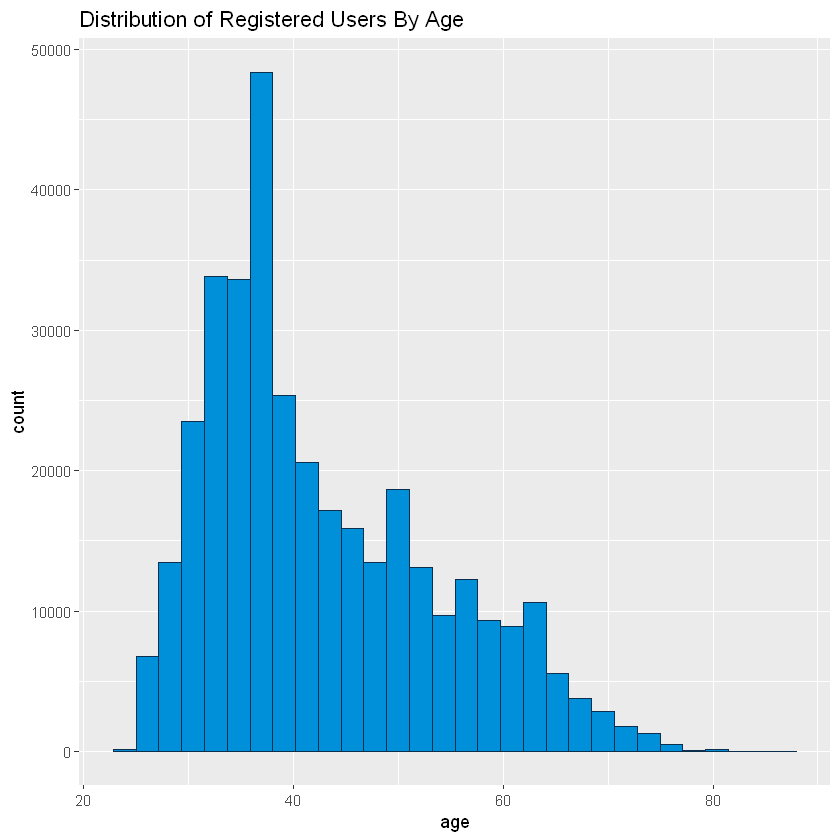

In [0]:
              # Plot Histogram
              ggplot(tripsregistered, aes(age)) + 
                geom_histogram(color="#0b2f4c", fill="#0090DA") +
                ggtitle("Distribution of Registered Users By Age")

In [0]:
              # Distribution by Age and Gender
              males <- tripsregistered %>%
                filter(gender=="Male")
              
              females <- tripsregistered %>%
                filter(gender=="Female")
              
              # Summaries
              summary(males$age)
              summary(females$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   24.0    34.0    40.0    43.2    51.0    85.0  571088 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   24.0    33.0    38.0    41.3    47.0    87.0  184682 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 755770 rows containing non-finite values (stat_bin)."

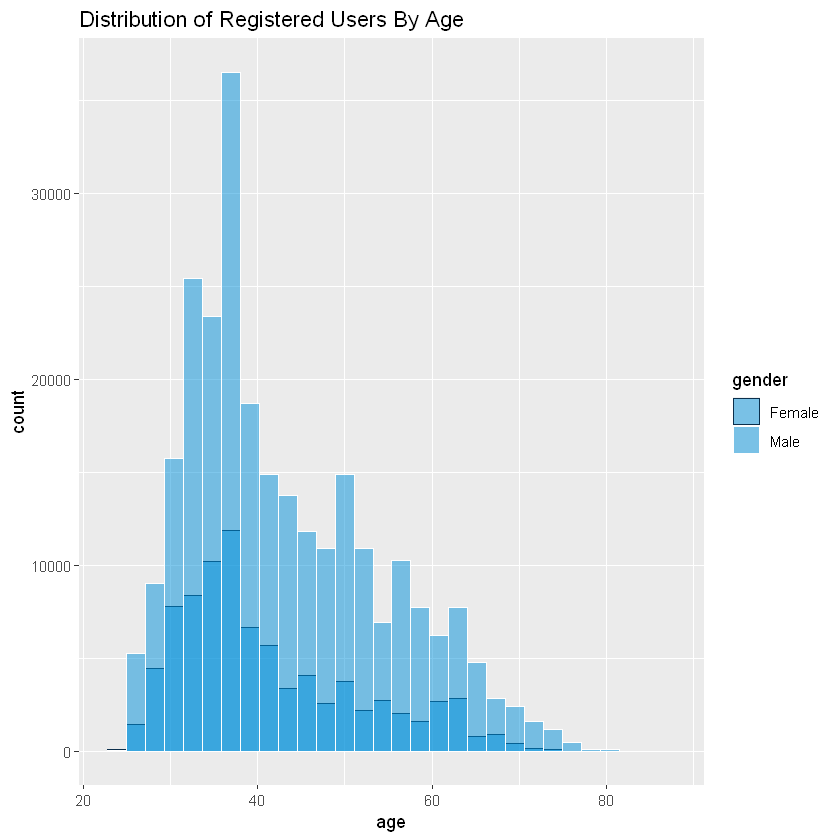

In [0]:
              # Plots
              ggplot(tripsregistered, aes(x=age, color=gender))+ 
                geom_histogram(fill="#0090DA", alpha=0.5, position="identity") +
                scale_color_manual(values=c("#0b2f4c", "#FFFFFF")) +
                #scale_color_brewer(palette="Blues") +
                ggtitle("Distribution of Registered Users By Age")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 755770 rows containing non-finite values (stat_bin)."

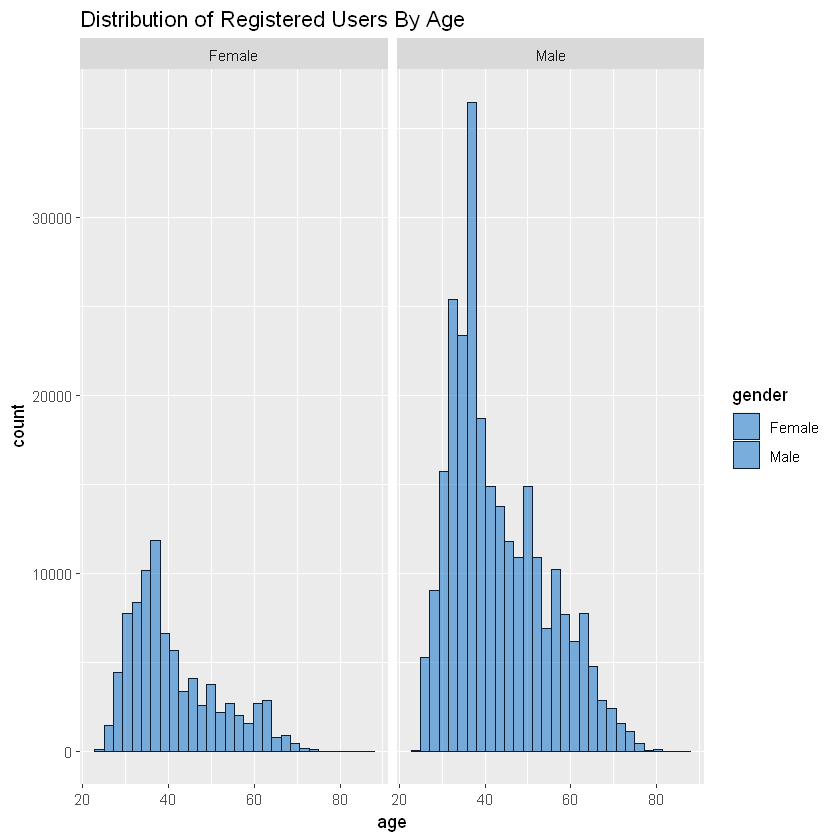

In [0]:
              ggplot(tripsregistered, aes(x=age, color=gender))+ 
                geom_histogram(fill="#006AC6", alpha=0.5, position="identity") + 
                scale_color_manual(values=c("#0D1D32", "#0D1D32")) +
                facet_wrap(~gender) +
                ggtitle("Distribution of Registered Users By Age")

In [0]:
 #--- Trips Duration (Duration measured in seconds)---#
      # Creating Set and Clean Up
          tripsdur <- trips  %>%
            select(duration, subsc_type, birth_date, gender,age)
          summary(trips$duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   -6900      412      660     1200     1082 11994458 

In [0]:
        # Clean Up of Outliers
          tripsdur <- tripsdur[tripsdur$duration > 60,] # Remove all trips less than 60 seconds.seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure)
          tripsdur <- tripsdur[tripsdur$duration < 86400,] # Remove all trips greater than 86,400 seconds (24 hours)
          summary(tripsdur$duration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     420     660    1048    1095   86373 

In [0]:
        # Convert Duration from Seconds to Minutes
          tripsdur <- tripsdur %>%
            mutate(duration=(duration/60))
          summary(tripsdur$duration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.017    7.000   11.000   17.472   18.250 1439.550 

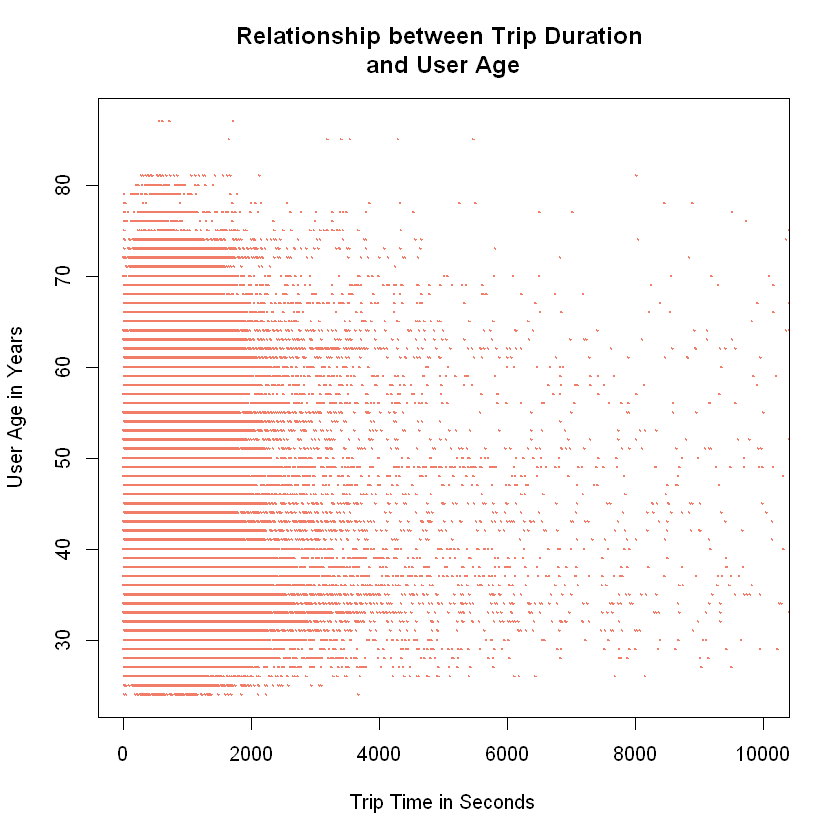

In [0]:
   ## - Age vs Duration - ## 
      # Plot of Relationship between duration and age
        plot(trips$duration, trips$age,xlim= c(1, 10000), 
             col = "#f17c67",pch=10, cex=.1 , xlab="Trip Time in Seconds",ylab="User Age in Years", 
             main="Relationship between Trip Duration \nand User Age") 

Warning message:
"Removed 1220375 rows containing missing values (geom_point)."

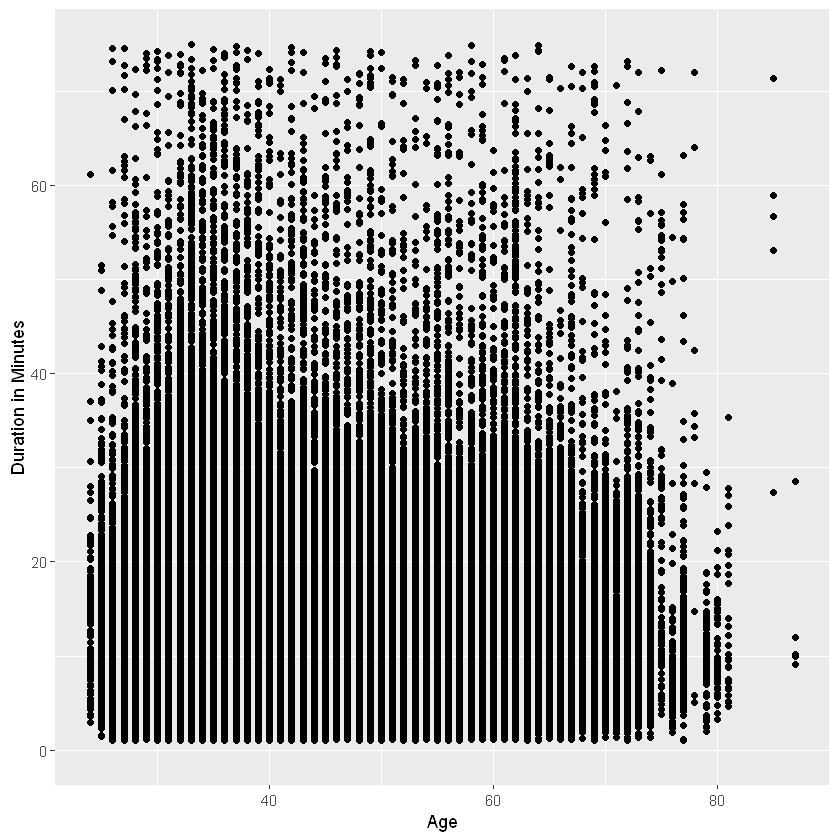

In [0]:
      # Relationship between Age and Duration (Same as above, different view, removed outliers)
        ggplot(tripsdur, aes(age, (duration))) + 
          geom_point() + xlab("Age") + ylab("Duration in Minutes") +
          ylim(0,75)

Warning message:
"Removed 33744 rows containing non-finite values (stat_boxplot)."

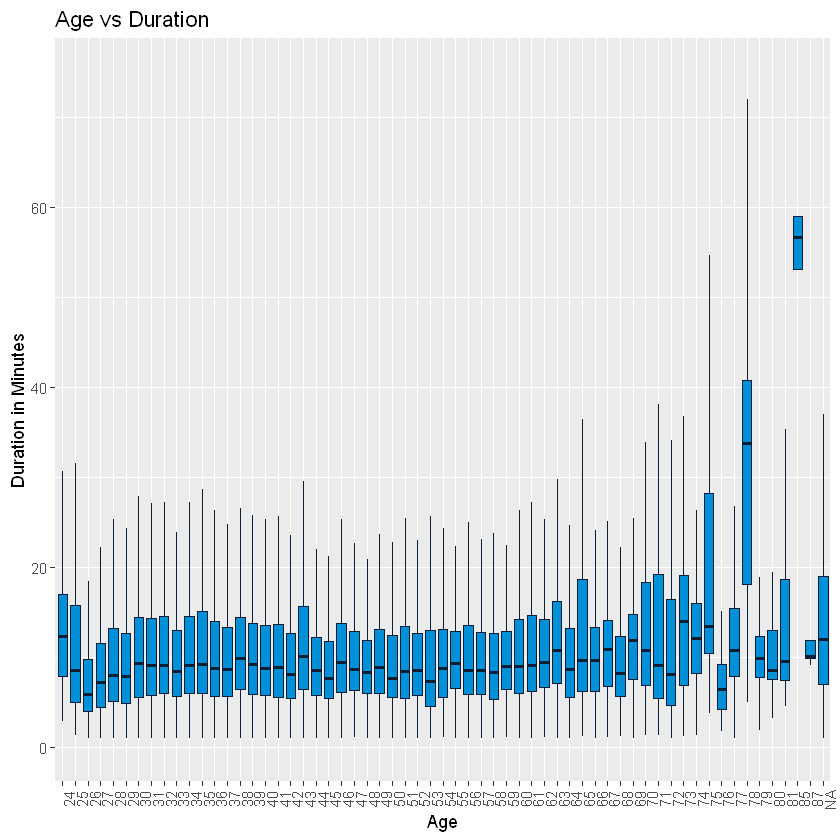

In [0]:
      # Boxplot Age vs duration. Have to convert age to factor
        ggplot(tripsdur, aes(x=factor(age), y=(duration))) + 
          geom_boxplot(outlier.shape=NA, fill="#0090DA", color="#0D1D32") + #remove outliers
          ggtitle("Age vs Duration") +
          theme(axis.text.x = element_text(angle = 90)) + xlab("Age") + ylab("Duration in Minutes") +
          ylim(0,75) 

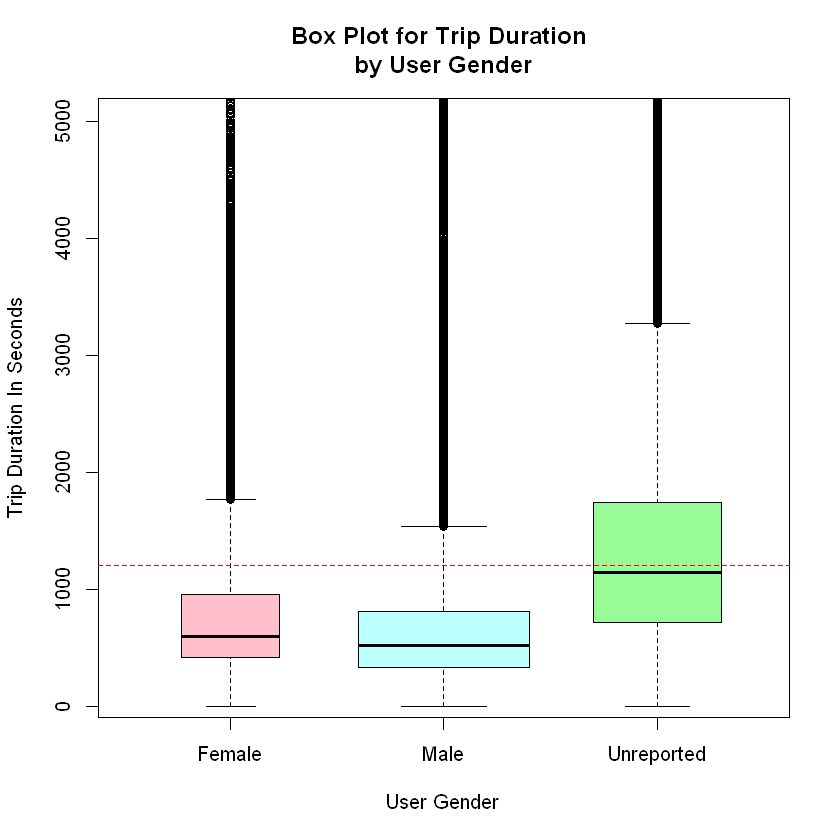

In [0]:
   ## - Duration By Gender - ##      
        # Bloxplot trip duration by user gender
          boxplot(trips$duration~trips$gender, axisnames = FALSE, ylim=c(100,5000), varwidth = TRUE, outline = TRUE,xlab="User Gender",
                  ylab="Trip Duration In Seconds",col=c("pink","paleturquoise1","palegreen"),main="Box Plot for Trip Duration \nby User Gender")
          abline(h=mean(trips$duration), lty=2,col="red")

Warning message:
"Removed 33744 rows containing non-finite values (stat_boxplot)."

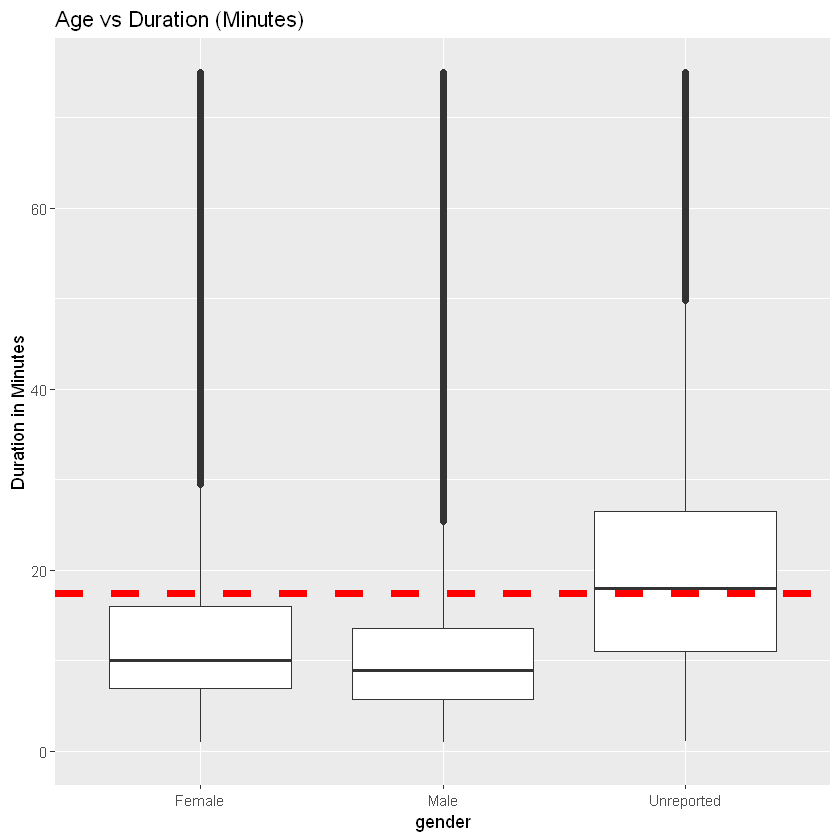

In [0]:
        # Boxplot Duration by Gender (Versin 2)
        ggplot(tripsdur, aes(x=gender, y=duration)) + 
          geom_boxplot() + 
          ylim(0,75)+ ggtitle("Age vs Duration (Minutes)") + ylab("Duration in Minutes") +
          geom_hline(yintercept=(mean(tripsdur$duration)), linetype="dashed",color = "red", size=2)

In [0]:
 #--- Popular Destinations ---#           
    # Popular Trips Set
      poptrips <- trips %>%
        select(start_date, strt_statn, end_date, end_statn, subsc_type, gender, age)
      poptrips$strt_statn <- as.factor(poptrips$strt_statn)
      poptrips$end_statn <- as.factor(poptrips$end_statn)
      poptrips <- poptrips[!is.na(poptrips$strt_statn), ] # remove NA start stations
      poptrips <- poptrips[!is.na(poptrips$end_statn), ] # remove NA end stations
      
    # Descriptive Data  
      length(unique(poptrips$strt_statn)) #142 Unique Stations
      length(unique(poptrips$end_statn)) #142 Unique Stations
      summary(poptrips) #top 5 start and end listed in summary by number

[1] 142

[1] 142

               start_date        strt_statn                     end_date      
 7/30/2013 17:18:00 :     25   22     :  56442   10/19/2013 16:26:00:     27  
 8/6/2013 17:50:00  :     25   36     :  42568   9/10/2013 17:43:00 :     26  
 9/10/2013 17:04:00 :     25   53     :  35438   8/13/2013 18:08:00 :     24  
 10/4/2013 17:06:00 :     24   67     :  33685   8/5/2013 17:30:00  :     24  
 7/30/2013 17:30:00 :     24   16     :  32859   10/17/2013 17:24:00:     23  
 10/17/2013 17:04:00:     23   42     :  32795   7/12/2013 08:56:00 :     23  
 (Other)            :1578827   (Other):1345186   (Other)            :1578826  
   end_statn            subsc_type             gender            age         
 22     :  56280   Casual    : 472592   Female    :271693   Min.   :24.0     
 36     :  43387   Registered:1106381   Male      :834688   1st Qu.:34.0     
 42     :  34916                        Unreported:472592   Median :40.0     
 67     :  34580                                        

In [0]:
    #--- Starting Stations ---#  
        ### By Gender ###
            
        # ALL DATA
                # Top Starting Locations
                poptrips %>%
                  group_by(strt_statn) %>%
                  summarize(Count=n()) %>%
                  arrange(desc(Count))
            
                # Percentage of Gender Reported
                poptrips %>%
                  group_by(gender) %>%
                  summarise (n = n()) %>%
                  mutate(precent = (n / sum(n))*100) %>%
                  arrange(desc(precent))
                
                # Top 10 Start by Gender (All Data)
                      topstations <- c("22","36","53","67","16","42","33","58","52","47")
                      ugenpopstart <- poptrips %>%
                        filter(strt_statn %in% topstations)

strt_statn,Count
22,56442
36,42568
53,35438
67,33685
16,32859
42,32795
33,31077
58,28285
52,26978
47,26818


gender,n,precent
Male,834688,52.86272
Unreported,472592,29.93034
Female,271693,17.20694


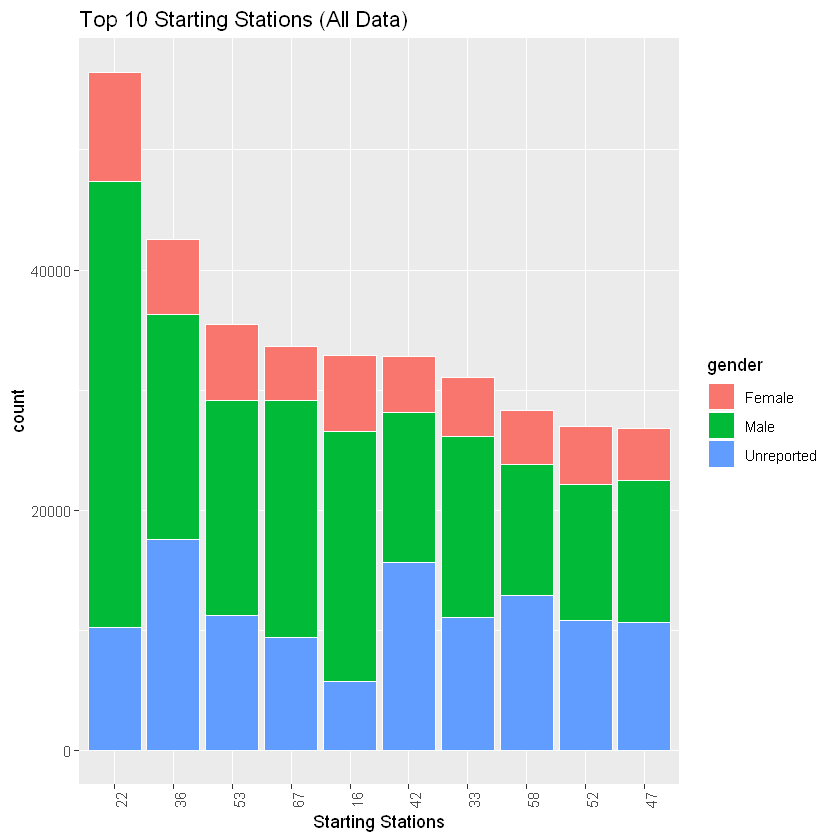

In [0]:
                     # ALL Data
                      reorder_size <- function(x) {
                        factor(x, levels = names(sort(table(x), decreasing = TRUE)))
                      }
                      ggplot(ugenpopstart, aes(x = reorder_size(strt_statn))) +
                        geom_bar(aes(fill=gender), color="white") +
                        xlab("Starting Stations") +
                        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
                        ggtitle("Top 10 Starting Stations (All Data)")

strt_statn,Count
22,46156
16,27089
36,25021
67,24274
53,24181
33,19964
43,19427
48,19020
40,18892
39,18161


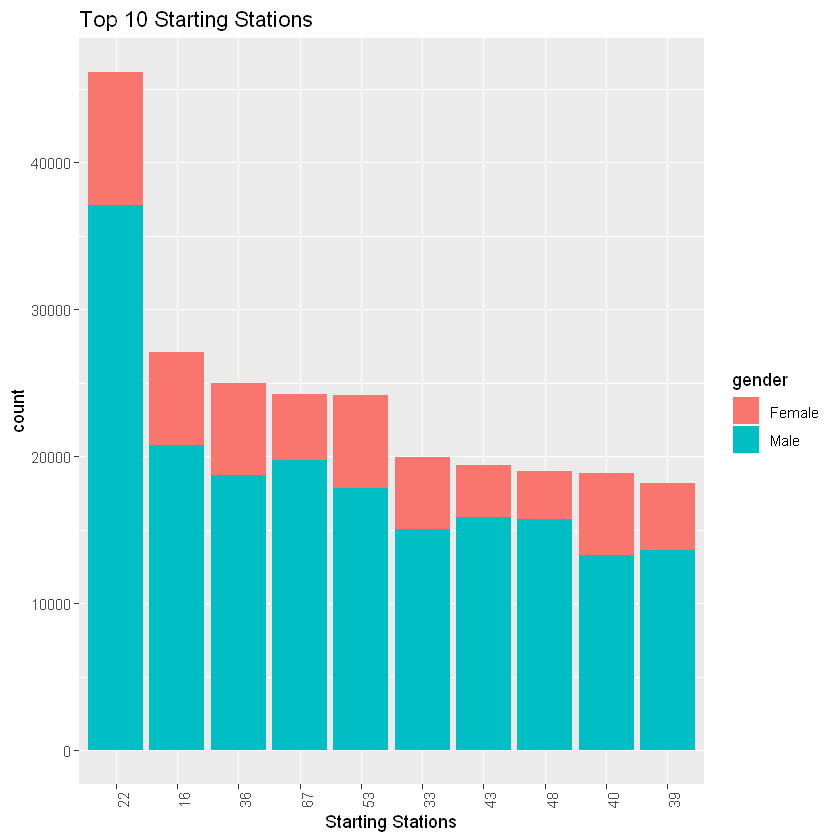

In [0]:
       # Excluding Unreported Gender
                # Top Starting Locations
                poptrips %>%
                  filter(gender!="Unreported") %>%
                  group_by(strt_statn) %>%
                  summarize(Count=n()) %>%
                  arrange(desc(Count))
                
                # Top 10 Start by Gender
                newtopstations <- c("22","16","36","67","53","33","43","48","40","39")
                genpopstart <- poptrips %>%
                  filter(gender!="Unreported") %>%
                  filter(strt_statn %in% newtopstations)
                
                # top 10 Plots
                reorder_size <- function(x) {
                  factor(x, levels = names(sort(table(x), decreasing = TRUE)))
                }
                ggplot(genpopstart, aes(x = reorder_size(strt_statn))) +
                  geom_bar(aes(fill=gender)) +
                  xlab("Starting Stations") +
                  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
                  ggtitle("Top 10 Starting Stations")

end_statn,Count
22,56280
36,43387
42,34916
67,34580
53,33369
33,32246
16,29665
43,27738
52,27222
74,26741


gender,n,precent
Male,834688,52.86272
Unreported,472592,29.93034
Female,271693,17.20694


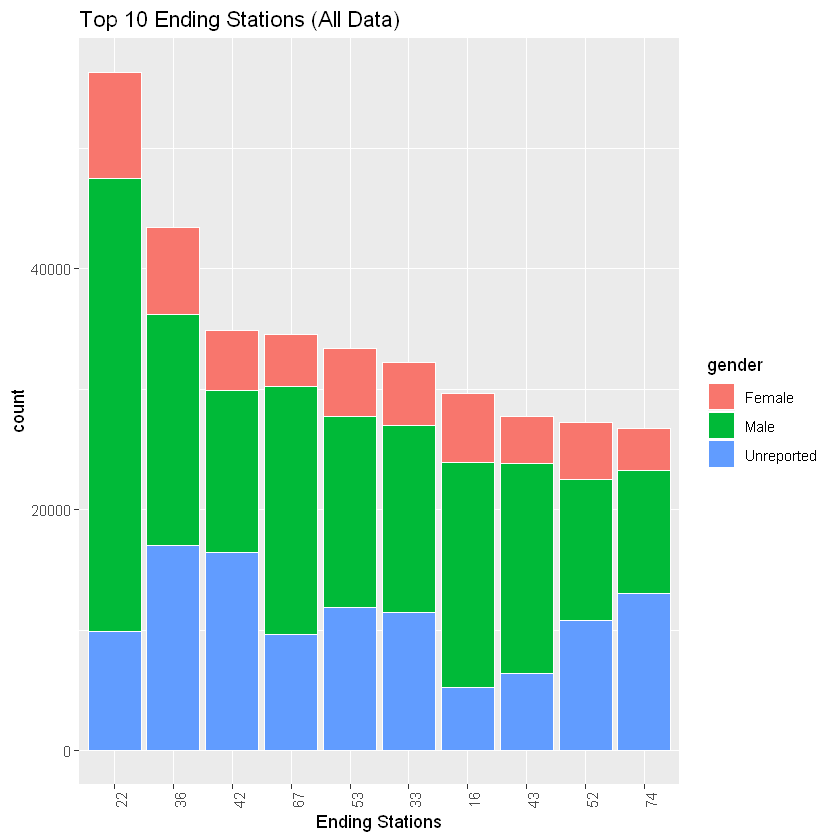

In [0]:
    #--- ENding Stations ---#  
        ### By Gender ###
        
        # ALL DATA
                  # Top Ending Locations
                  poptrips %>%
                    group_by(end_statn) %>%
                    summarize(Count=n()) %>%
                    arrange(desc(Count))
                  
                  # Percentage of Gender Reported
                  poptrips %>%
                    group_by(gender) %>%
                    summarise (n = n()) %>%
                    mutate(precent = (n / sum(n))*100) %>%
                    arrange(desc(precent))
                  
                  # Top 10 End by Gender (All Data)
                  topstations <- c("22","36","42","67","53","33","16","43","52","74")
                  ugenpopend <- poptrips %>%
                    filter(end_statn %in% topstations)
                  
                  
                  # ALL Data
                  reorder_size <- function(x) {
                    factor(x, levels = names(sort(table(x), decreasing = TRUE)))
                  }
                  ggplot(ugenpopend, aes(x = reorder_size(end_statn))) +
                    geom_bar(aes(fill=gender), color="white") +
                    xlab("Ending Stations") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
                    ggtitle("Top 10 Ending Stations (All Data)")

end_statn,Count
22,46382
36,26331
67,24934
16,24381
53,21469
43,21338
33,20798
48,20772
21,18452
42,18432


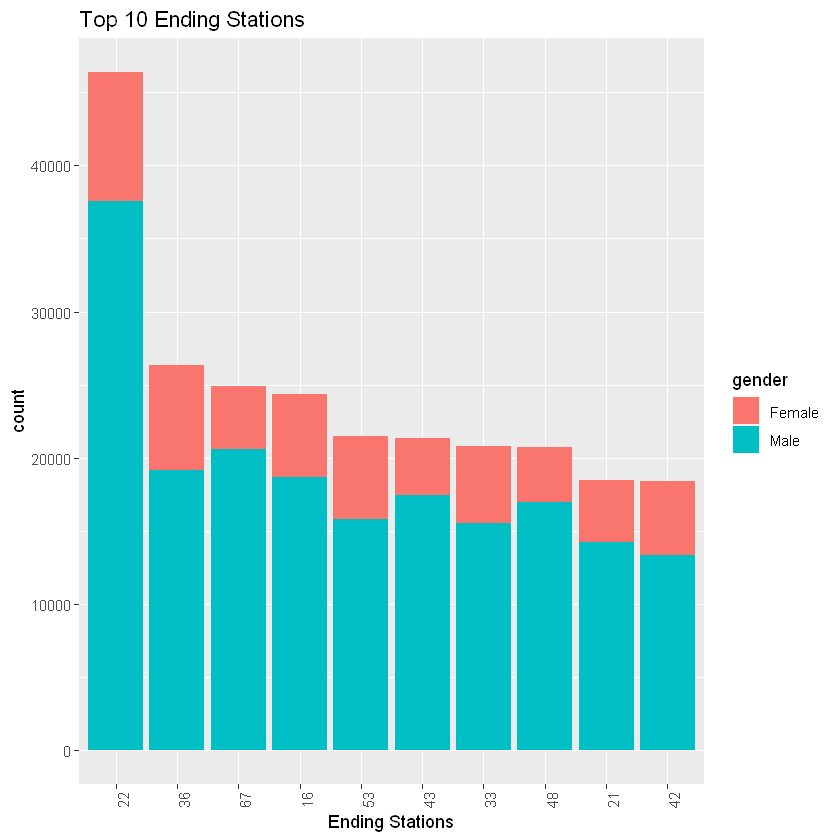

In [0]:
        # Excluding Unreported Gender
                  # Top Ending Locations
                  poptrips %>%
                    filter(gender!="Unreported") %>%
                    group_by(end_statn) %>%
                    summarize(Count=n()) %>%
                    arrange(desc(Count))
                  
                  # Top 10 end by Gender
                  newtopstations <- c("22","36","67","16","53","43","33","48","21","42")
                  genpopend <- poptrips %>%
                    filter(gender!="Unreported") %>%
                    filter(end_statn %in% newtopstations)
                  
                  # top 10 Plots
                  reorder_size <- function(x) {
                    factor(x, levels = names(sort(table(x), decreasing = TRUE)))
                  }
                  ggplot(genpopend, aes(x = reorder_size(end_statn))) +
                    geom_bar(aes(fill=gender)) +
                    xlab("Ending Stations") +
                    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
                    ggtitle("Top 10 Ending Stations")
                  
        # Station 22 is South Station - 700 Atlantic Ave. (This is the Main Transportation hub in Downtown Boston)
        # Station 36 is Boston Public Library - 700 Boylston St.  (Boston Public Library)
        # Station 67 is MIT at Mass Ave / Amherst St (MIT)
        # Station 53 is Beacon St / Mass Ave (Boston University)
        # Station 16 is Back Bay / South End Station (ANother major transportation hub)

Warning message:
"Factor `station` contains implicit NA, consider using `forcats::fct_explicit_na`"

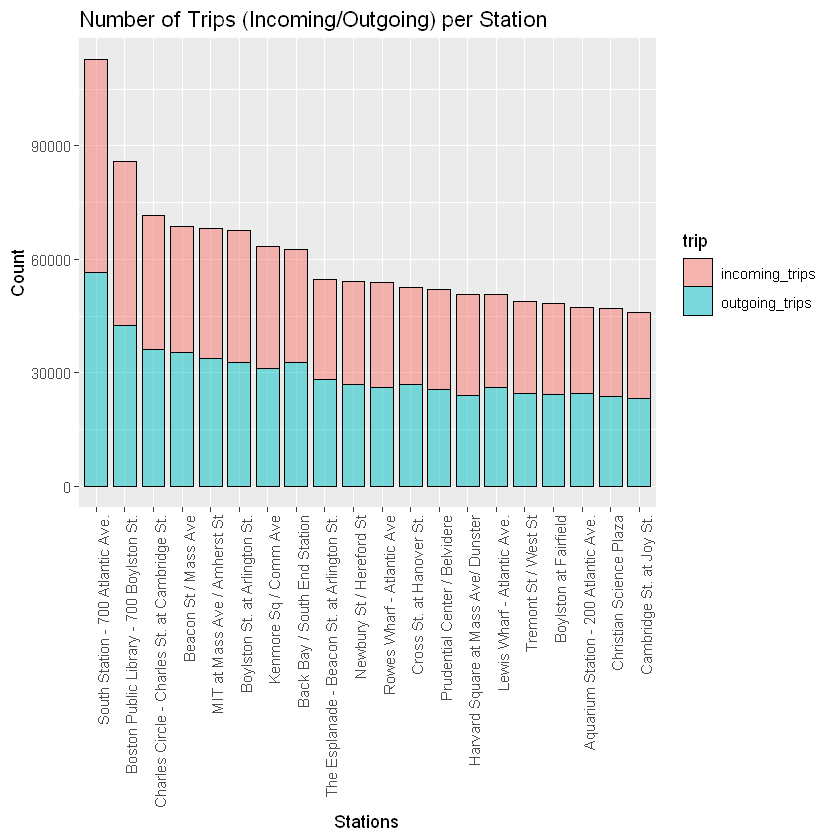

In [0]:
#-------------------Incoming/outgoing trips per station--------------------#

                  
# Creating Data for plotting                  
          #aggregate by station and sort by count
                hubway_trips %>% group_by(strt_statn) %>% summarise(outgoing_trips=n()) %>% 
                  as.data.frame() %>% arrange(., desc(outgoing_trips)) %>% rename(id = strt_statn) -> trips.o
                
                hubway_trips %>% group_by(end_statn) %>% summarise(incoming_trips=n()) %>%
                  as.data.frame() %>% arrange(., desc(incoming_trips)) %>% rename(id = end_statn) -> trips.i
                
          # merge by station and add station info from hubway.stations
          full_join(trips.o, trips.i, by = "id") -> trips.station
          left_join(trips.station, hubway_stations, by = "id") %>% select(station, outgoing_trips, incoming_trips) %>%
            group_by(station) %>% summarise(outgoing_trips=sum(outgoing_trips), incoming_trips=sum(incoming_trips))  %>% 
            arrange(., desc(outgoing_trips), desc(incoming_trips)) -> trips.station
          
          # top 20
          trips.station %>% slice(1:20) -> trips.station
          
          # gather for plotting
          trips.station %>% gather ("trip","count", 2:3) %>% 
            arrange(., desc(count))-> trips.station 
          
# Plotting Data
          ggplot(trips.station, aes(x = reorder(station, -count), y=count, fill=trip)) +
            geom_bar(stat="identity",color=I("black"), size=0,alpha = 0.5,width=0.8) +
            xlab("Stations") + ylab("Count") +
            theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
            ggtitle("Number of Trips (Incoming/Outgoing) per Station")


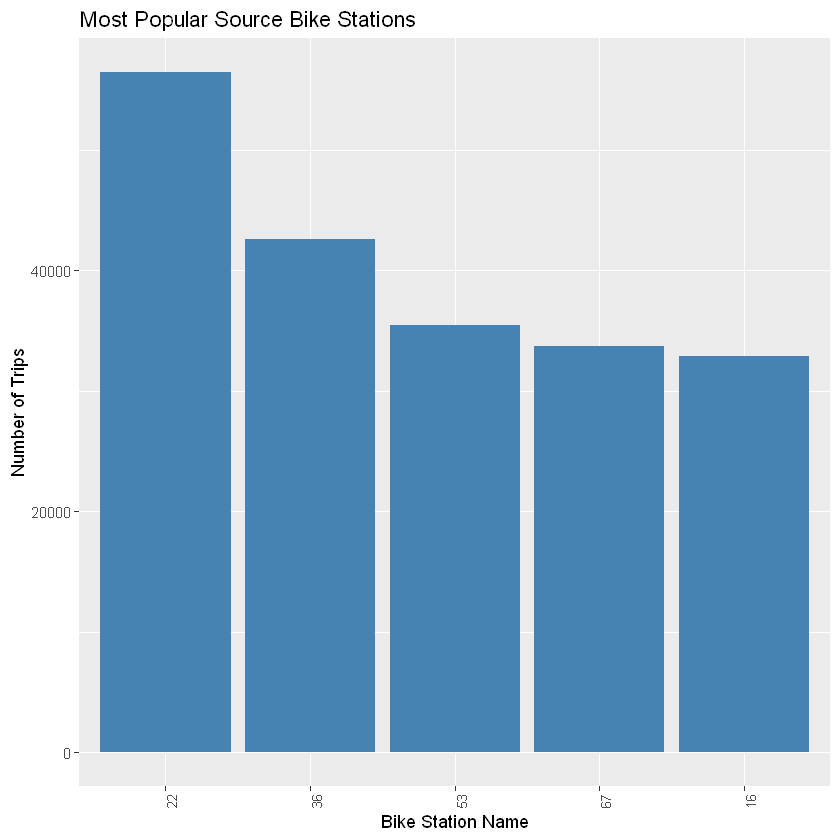

In [0]:
#------- Most popular source stations-----------------#

#group trips by start station name and count number of trips for each station

          hubway_trips$strt_statn_name <- as.character(trips$strt_statn)
          hubway_trips$end_statn_name  <- as.character(trips$end_statn)
          
          tripsby_strt_statn <- hubway_trips %>%
            group_by(strt_statn_name) %>%
            summarise(number_trips = n()) %>%
            select(strt_statn_name, number_trips) %>%
            arrange(desc(number_trips)) %>%
            ungroup()
          tripsby_strt_statn$strt_statn_name <- factor(tripsby_strt_statn$strt_statn_name, 
                                                       levels = tripsby_strt_statn$strt_statn_name, ordered = TRUE)
#Plot
        ggplot(data = tripsby_strt_statn[1:5, ], 
               aes(x = strt_statn_name, y = number_trips)) +
          geom_bar(fill = 'steelblue', stat = 'identity') + 
          ggtitle("Most Popular Source Bike Stations")+
          ylab("Number of Trips") +
          xlab("Bike Station Name") +
          theme(axis.text.x = element_text(size = 8))+theme(axis.text.x = element_text(angle = 90, hjust = 1)) 

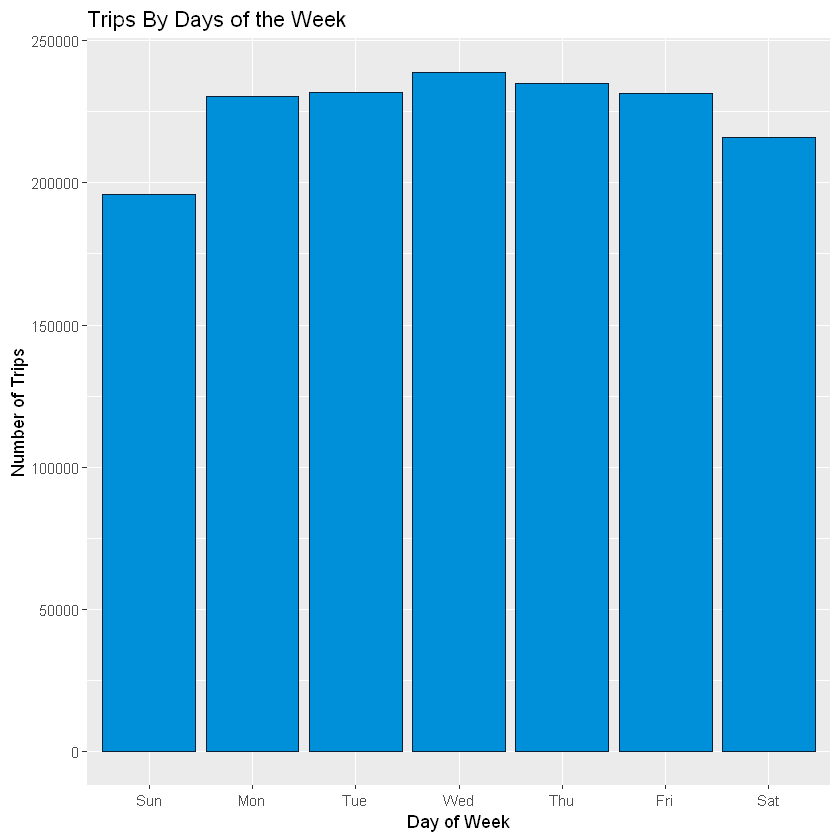

In [0]:
#---------------------Trips over different days of the week and Trips by time of day-----------------------------------------#

#Creating Data Frames
        trips$start_date <- mdy_hms(hubway_trips$start_date, tz = 'EST')
        trips$end_date   <- mdy_hms(hubway_trips$end_date, tz = 'EST')
        
        trips$day_of_week <- wday(trips$start_date, label = TRUE)

#Plot        
        ggplot(data = trips, aes(x = day_of_week)) + geom_bar(fill = '#0090DA', color="#0D1D32")+
          ggtitle("Trips By Days of the Week")+
          ylab("Number of Trips") +
          xlab("Day of Week")

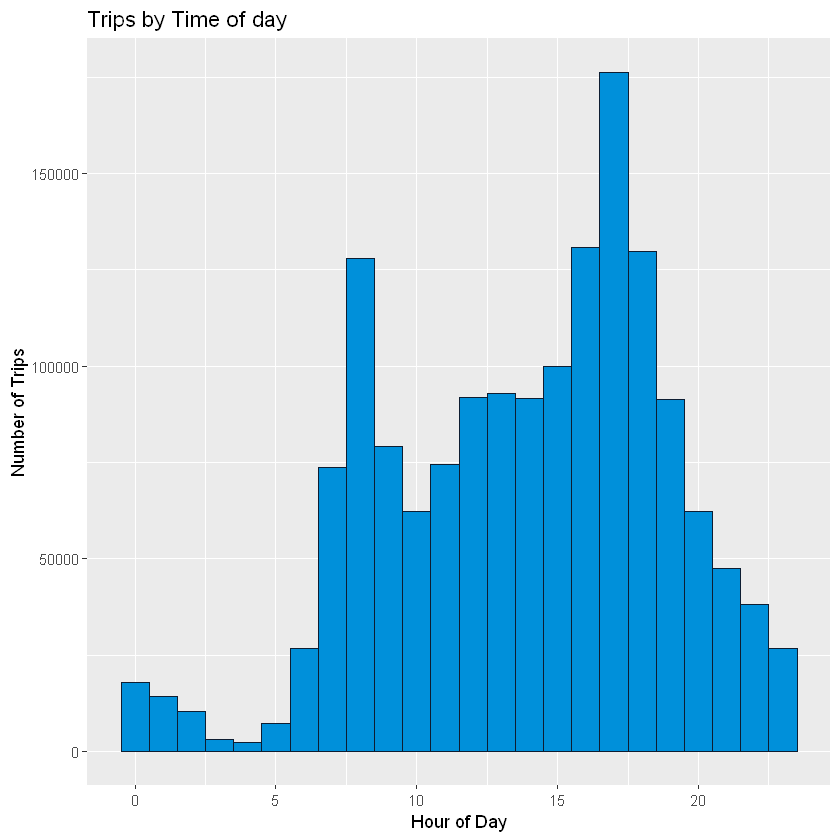

In [0]:
    #Plot
        trips$hour_of_day <- hour(trips$start_date)
        ggplot(data = trips, aes(x = hour_of_day)) + 
          geom_histogram(fill = '#0090DA', colour = '#0D1D32', binwidth = 1)+
          ggtitle("Trips by Time of day")+
          ylab("Number of Trips") +
          xlab("Hour of Day")